##### Import Libraries 

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Read Dataset

In [3]:
df = pd.read_csv('train_ctrUa4K.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.drop(['Loan_ID'] , axis = 1 , inplace = True )

##### Quick EDA For Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.isnull().mean()*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.select_dtypes('number').describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.select_dtypes('object').describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


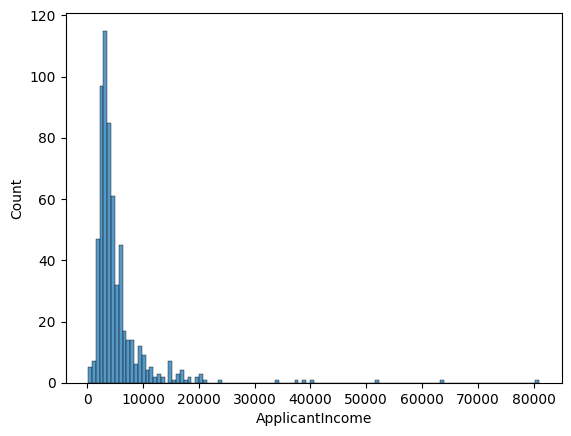

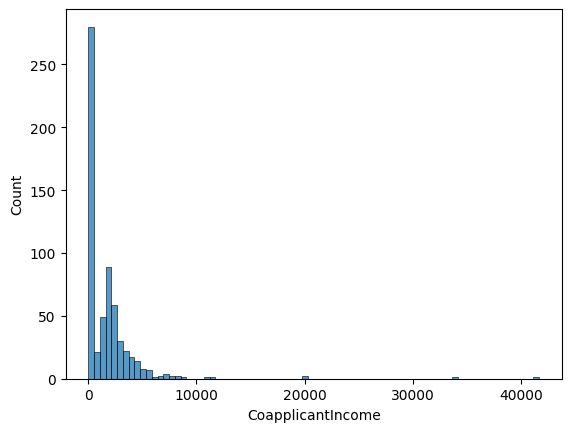

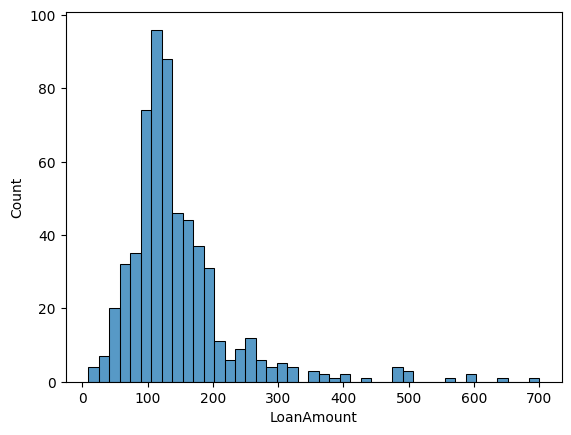

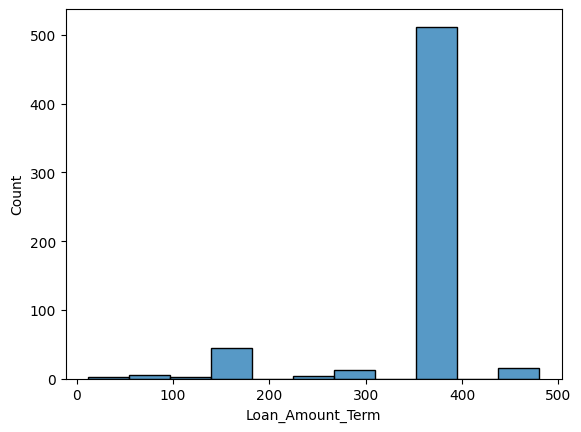

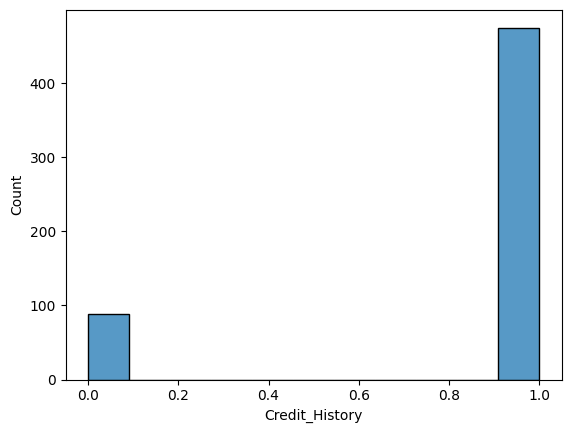

In [11]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(data = df , x = col)
    

In [14]:
df[df['Loan_Amount_Term'] > 360]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,N
109,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
168,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
179,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
248,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
298,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1.0,Rural,N
358,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N


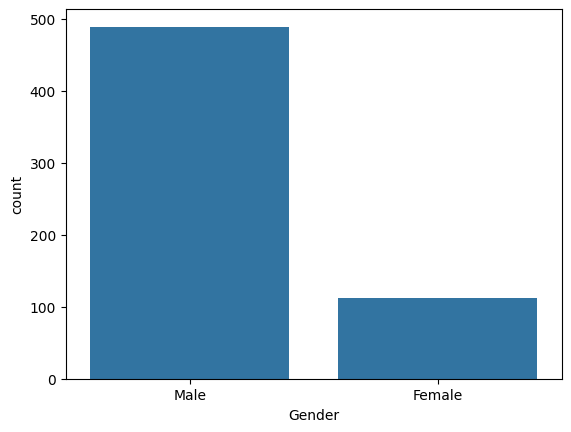

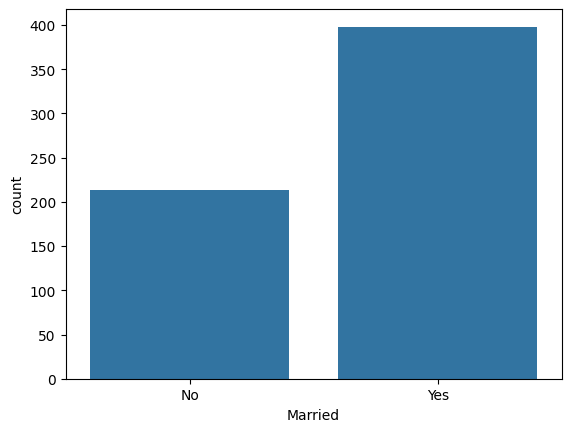

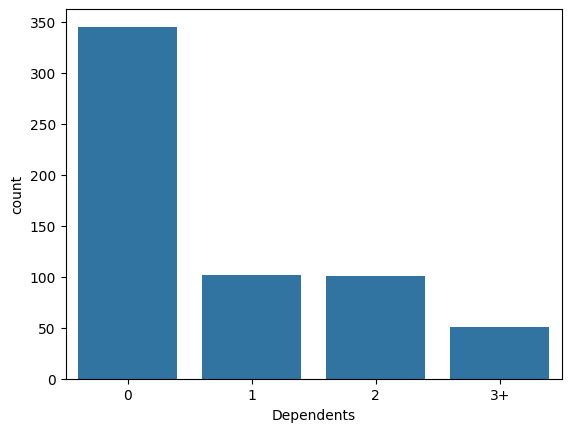

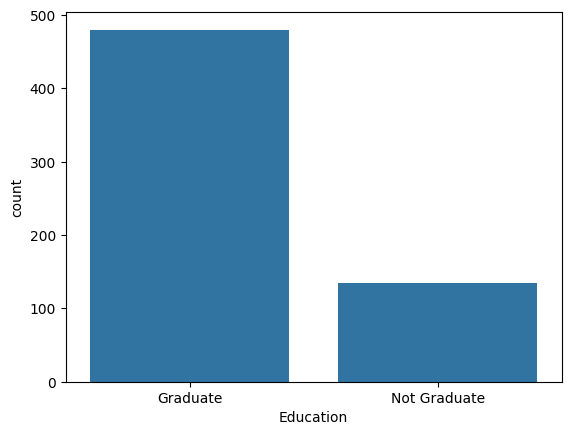

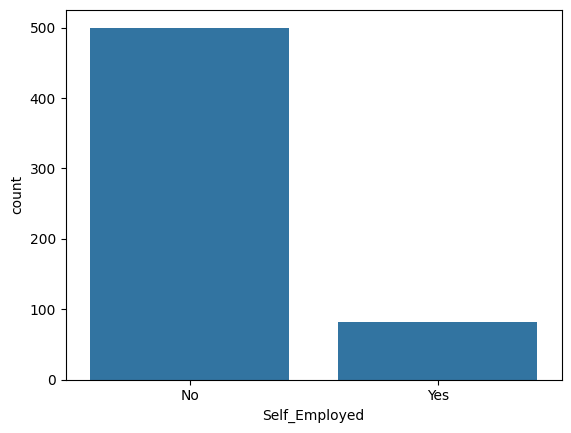

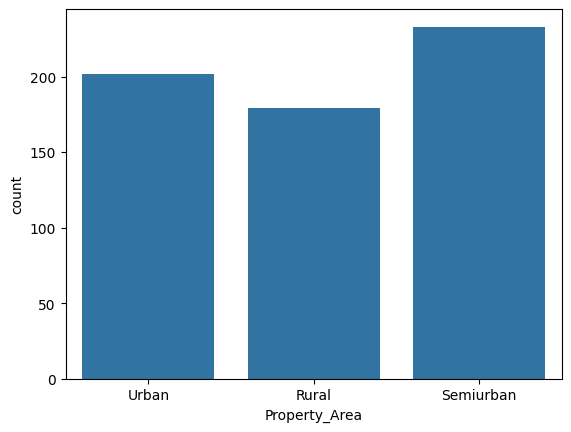

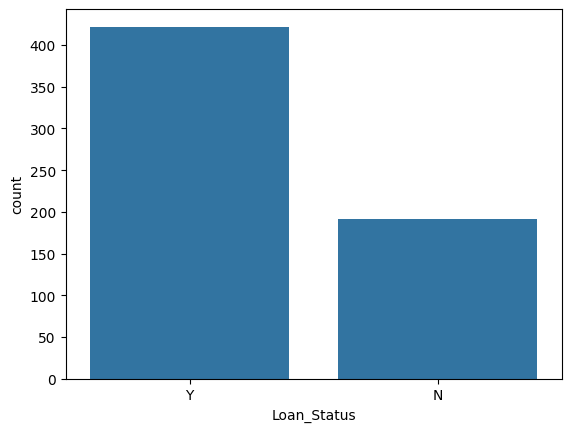

In [17]:
for col in df.select_dtypes('object').columns :
    
    
    plt.figure()
    sns.countplot(data = df , x = col)

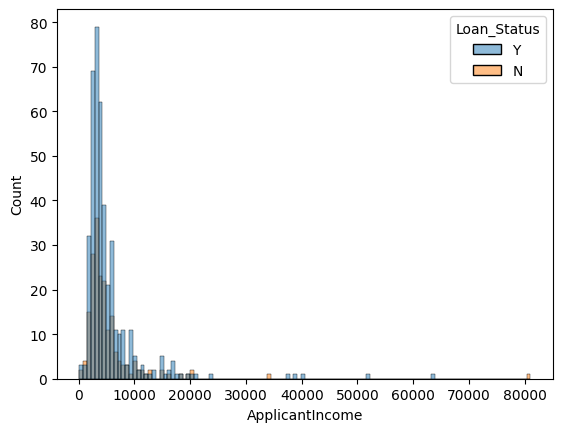

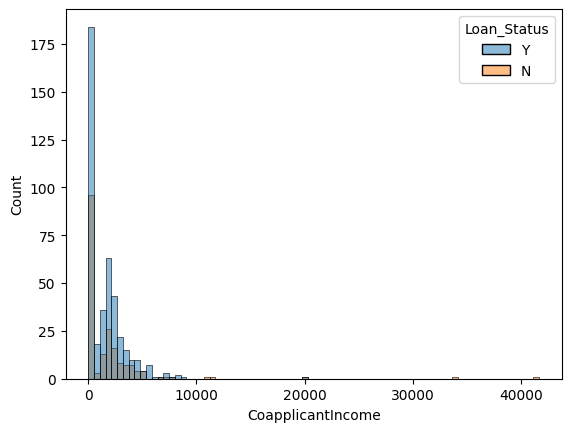

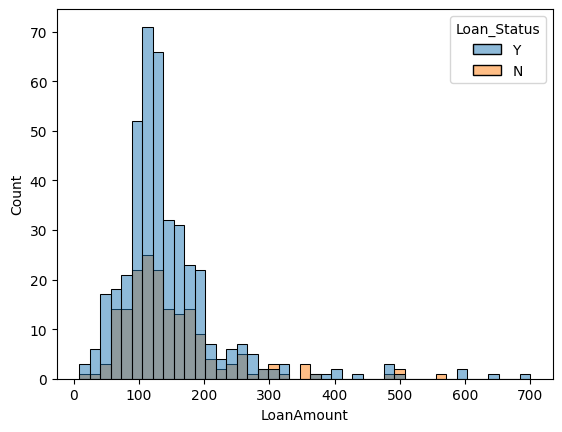

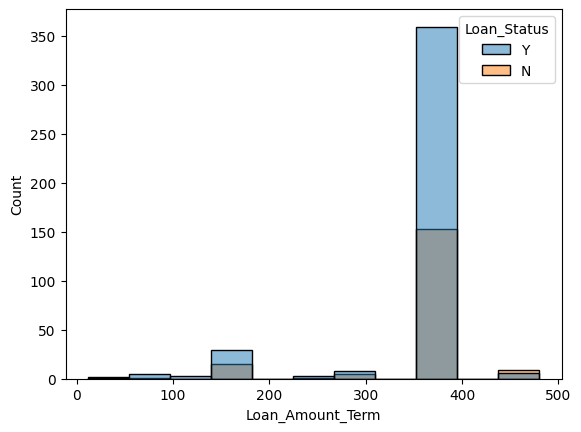

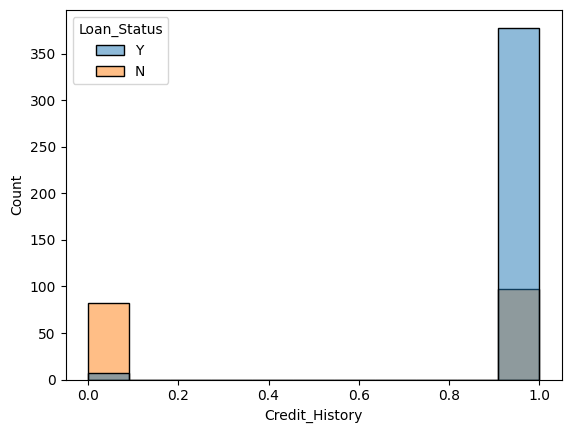

In [19]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(data = df , x = col , hue = 'Loan_Status')
    

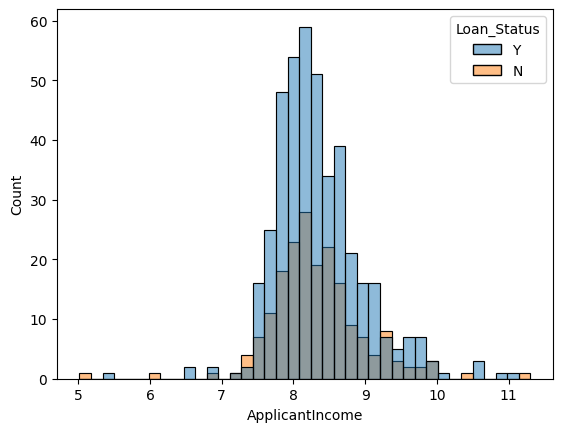

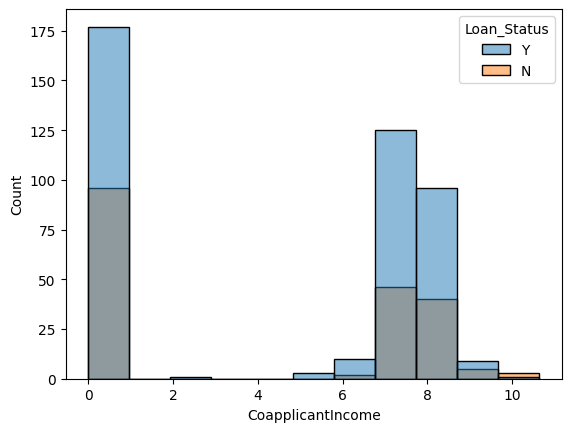

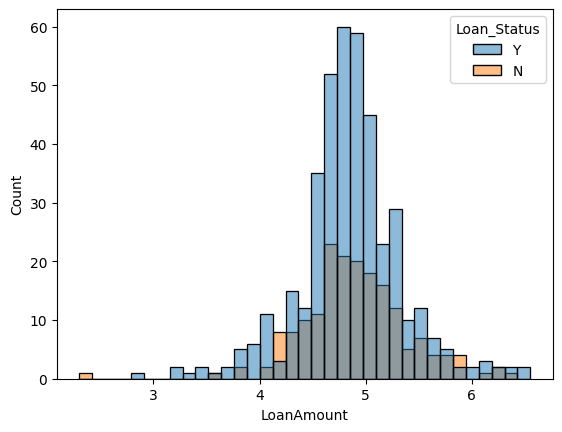

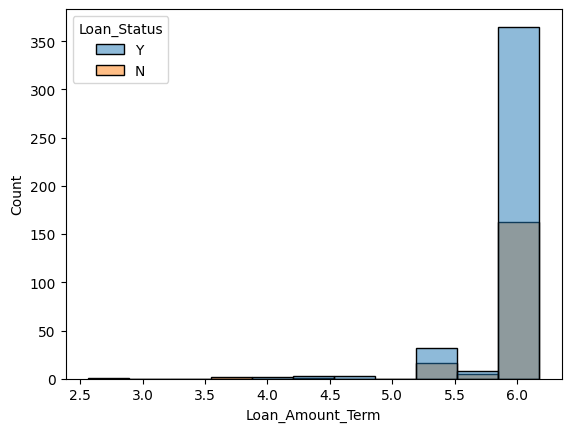

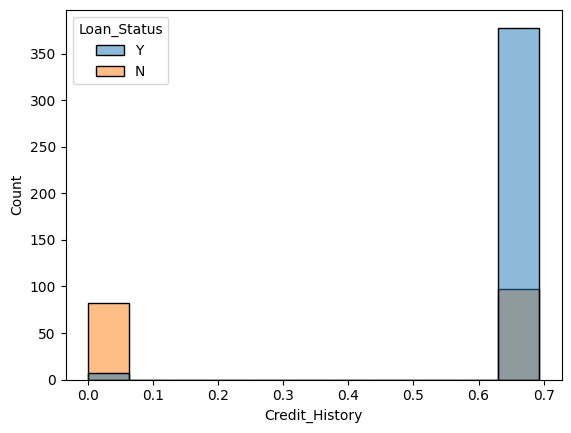

In [24]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(data = df , x = np.log1p(df[col]) , hue = 'Loan_Status')
    

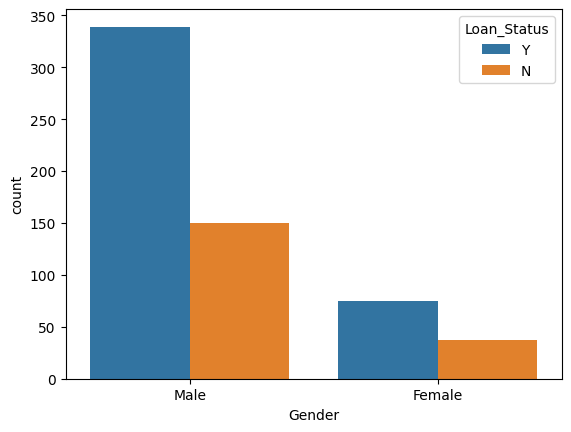

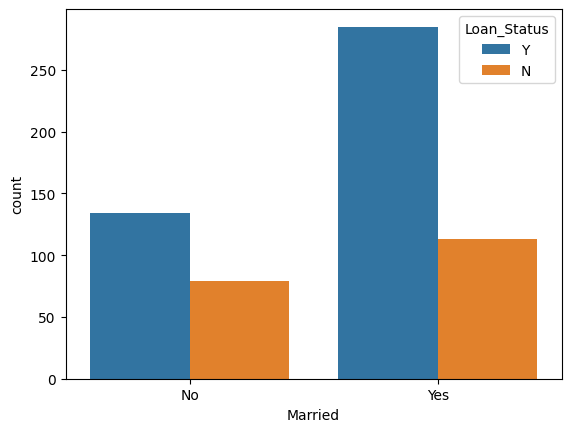

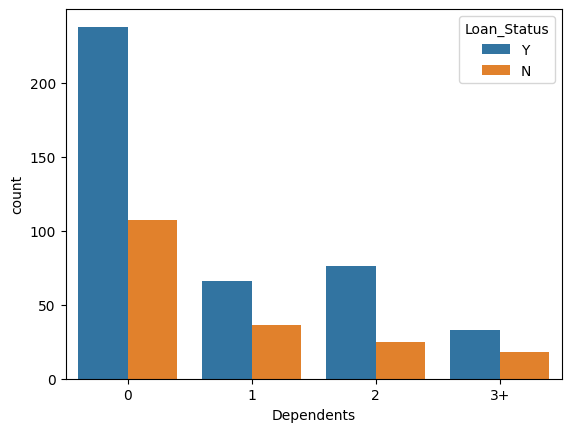

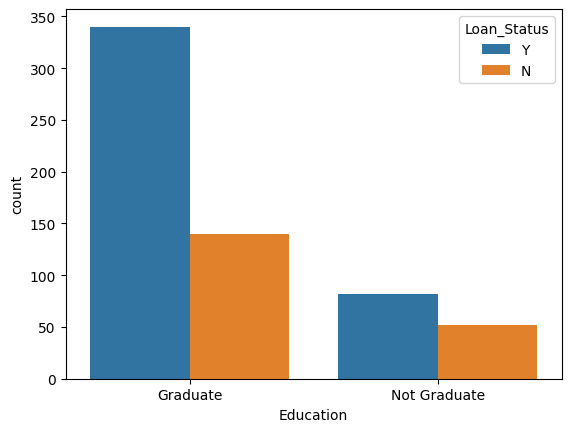

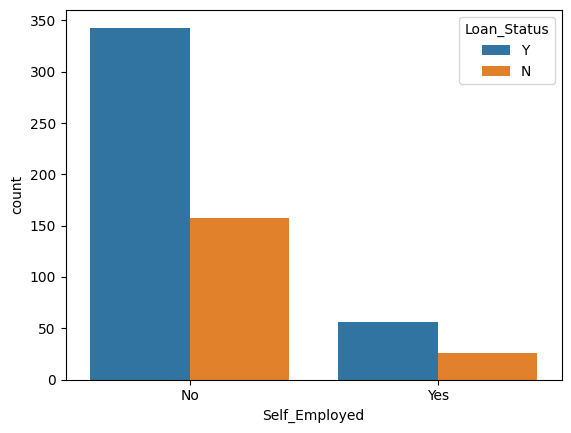

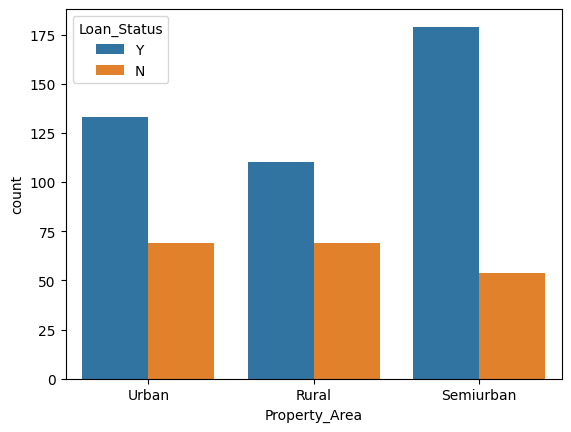

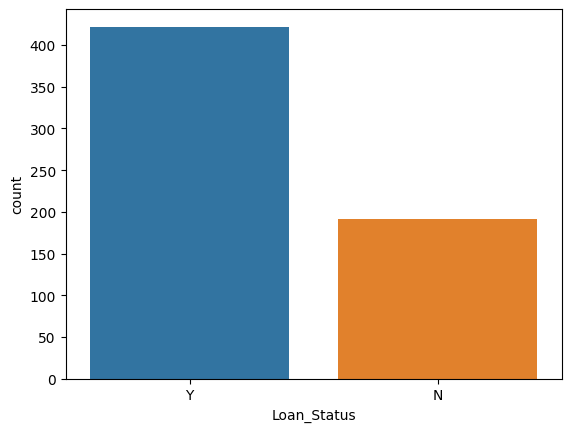

In [20]:
for col in df.select_dtypes('object').columns :
    
    
    plt.figure()
    sns.countplot(data = df , x = col , hue = 'Loan_Status')

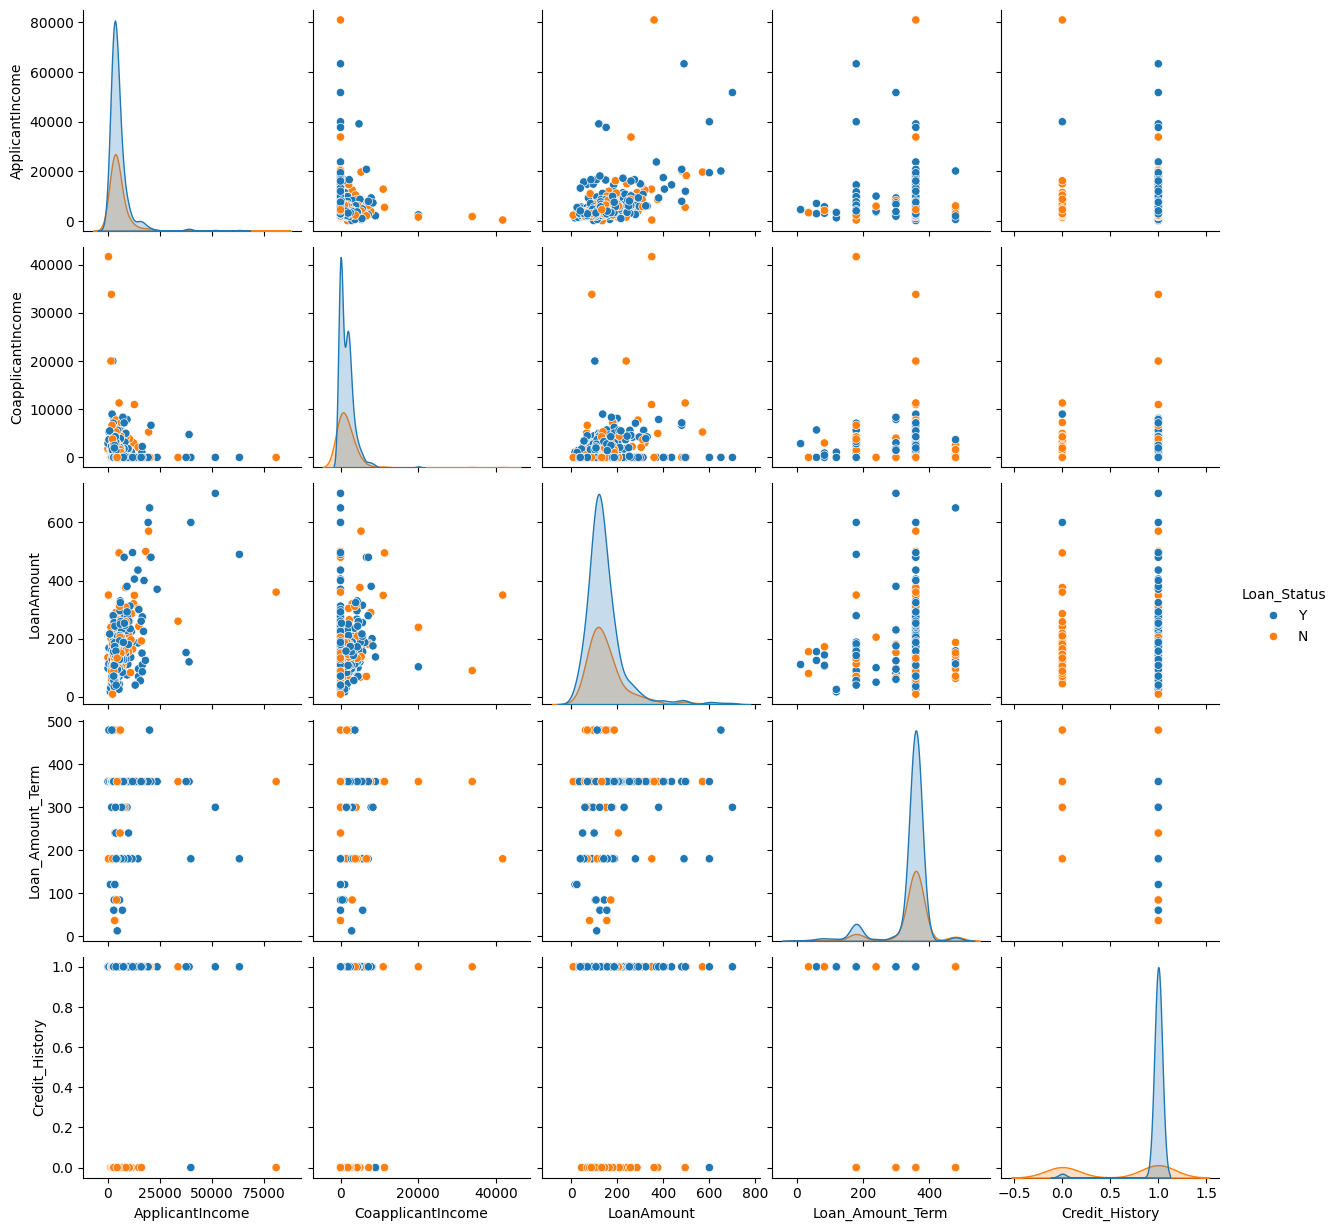

In [21]:
sns.pairplot(df , hue = 'Loan_Status')

<Axes: >

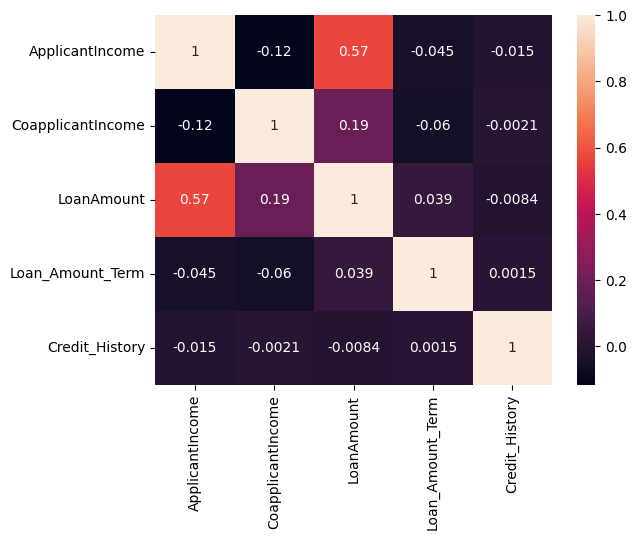

In [23]:
sns.heatmap(df.select_dtypes('number').corr() , annot=True )

##### Data Preparation & Modeling 

In [28]:
df['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
int('1') , '3+' -- > 3

In [30]:
df['Dependents'] = df['Dependents'].apply(lambda x : int(x[0]) if type(x) == str else x)

In [83]:
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import KNNImputer , SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate , GridSearchCV ,StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel

from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [36]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)

In [37]:
for col in df.select_dtypes('object').columns :
    
    print(f'{col} -- {df[col].nunique()}')
    
    

Gender -- 2
Married -- 2
Education -- 2
Self_Employed -- 2
Property_Area -- 3


In [38]:
df.select_dtypes('object').isnull().mean()*100

Gender           2.117264
Married          0.488599
Education        0.000000
Self_Employed    5.211726
Property_Area    0.000000
dtype: float64

In [40]:
df.select_dtypes('object').columns 

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [42]:
x ,  y = df.drop(['Loan_Status'] , axis = 1 ) , df['Loan_Status']

* category columns 
>* impute missing + ohe encoder 
>* impute missing + be encoder 

* numeric columns 
>* imputing missing + log 
>* imputing missing 

In [43]:
cat_ohe_pl = make_pipeline(SimpleImputer(strategy='most_frequent') ,
                           OneHotEncoder(sparse_output=False , drop = 'first'))


cat_be_pl = make_pipeline(SimpleImputer(strategy='most_frequent') ,
                          BinaryEncoder())


cat_preprocessing = ColumnTransformer(transformers=[
    ('cat_ohe_pl' , cat_ohe_pl , ['Gender', 'Married', 'Education', 'Self_Employed']),
    ('cat_be_pl' , cat_be_pl ,  ['Property_Area'])
] , remainder='passthrough')

cat_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_ohe_pl',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed']),
                                ('cat_be_pl',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binaryencoder',
                                                  BinaryEncoder())]),
                                 ['Property_Area'])])

In [48]:
cat_preprocessing.fit_transform(x.select_dtypes('object'))

array([[1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1.],
       ...,
       [1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [51]:
x.select_dtypes('number').isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

* numeric columns 
>* imputing missing + log 
>* imputing missing 

In [55]:
num_imp_log = make_pipeline(KNNImputer() ,
                            FunctionTransformer(np.log1p))


num_imp = make_pipeline(SimpleImputer(strategy='most_frequent'))


num_preprocessing = ColumnTransformer(transformers=[
    ('num_imp_log' , num_imp_log , ['ApplicantIncome','CoapplicantIncome','LoanAmount']),
    ('num_imp' , num_imp , ['Dependents' , 'Loan_Amount_Term' , 'Credit_History'])
] , remainder='passthrough')

num_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_imp_log',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>))]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('num_imp',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Dependents', 'Loan_Amount_Term',
                                  'Credit_History'])])

In [59]:
num_preprocessing.fit_transform(x.select_dtypes('number'))

array([[  8.67419694,   0.        ,   5.00260312,   0.        ,
        360.        ,   1.        ],
       [  8.43032726,   7.31920246,   4.8598124 ,   1.        ,
        360.        ,   1.        ],
       [  8.00670085,   0.        ,   4.20469262,   0.        ,
        360.        ,   1.        ],
       ...,
       [  8.99628044,   5.48479693,   5.53733427,   1.        ,
        360.        ,   1.        ],
       [  8.93379604,   0.        ,   5.23644196,   2.        ,
        360.        ,   1.        ],
       [  8.43032726,   0.        ,   4.8978398 ,   0.        ,
        360.        ,   0.        ]])

In [61]:
x.select_dtypes('number').columns 

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [62]:
preprocessing = ColumnTransformer(transformers=[
    
    ('cat_preprocessing' ,cat_preprocessing , ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'] ),
    
    ('num_preprocessing' , num_preprocessing , ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
    
] , remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_preprocessing',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('cat_ohe_pl',
                                                                  Pipeline(steps=[('simpleimputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('onehotencoder',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 sparse_output=False))]),
                                                                  ['Gender',
                                                                   'Married',
                                                                   'Education',
                                                                   'Self_Employed']),
                                                                 ('cat_be_pl...
                                                                                  ('functiontransformer',
                                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                                  ['ApplicantIncome',
                                                                   'CoapplicantIncome',
                                                                   'LoanAmount']),
                                                                 ('num_imp',
                                                                  Pipeline(steps=[('simpleimputer',
                                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                                  ['Dependents',
                                                                   'Loan_Amount_Term',
                                                                   'Credit_History'])]),
                                 ['Dependents', 'ApplicantIncome',
                                  'CoapplicantIncome', 'LoanAmount',
                                  'Loan_Amount_Term', 'Credit_History'])])

In [63]:
pl = make_pipeline(preprocessing , StandardScaler() , LogisticRegression())
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['Gender',
                                                                                    'Married',
                                                                                    'Edu...
                                                                                    'CoapplicantIncome',
                                                                                    'LoanAmount']),
                                                                                  ('num_imp',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(strategy='most_frequent'))]),
                                                                                   ['Dependents',
                                                                                    'Loan_Amount_Term',
                                                                                    'Credit_History'])]),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [66]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

In [72]:
pl.steps[-1][0]

'logisticregression'

In [73]:
for model in models :
    
    
    pl = make_pipeline(preprocessing ,SMOTE(), StandardScaler() , model)
    
    scores = cross_validate(estimator=pl , X = x  , y = y , cv=StratifiedKFold(n_splits=5) ,
                            scoring='f1' , return_train_score=True )
    
    print(pl.steps[-1][0])
    print(f'Train Avg f1 : {scores["train_score"].mean()}')
    print(f'Test Avg f1 : {scores["test_score"].mean()}')
    print('*'*50)

logisticregression
Train Avg f1 : 0.8465204369120674
Test Avg f1 : 0.8228984886973502
**************************************************
kneighborsclassifier
Train Avg f1 : 0.8693489380209704
Test Avg f1 : 0.7602368236558111
**************************************************
gaussiannb
Train Avg f1 : 0.875338920482678
Test Avg f1 : 0.8755078396804716
**************************************************
svc
Train Avg f1 : 0.8915191515493385
Test Avg f1 : 0.8203417586063066
**************************************************
decisiontreeclassifier
Train Avg f1 : 1.0
Test Avg f1 : 0.7631586702450879
**************************************************
randomforestclassifier
Train Avg f1 : 1.0
Test Avg f1 : 0.8450628555857425
**************************************************
xgbclassifier
Train Avg f1 : 1.0
Test Avg f1 : 0.8229539241311372
**************************************************


In [74]:
for model in models :
    
    
    pl = make_pipeline(preprocessing , StandardScaler(), SMOTE(),
                       SelectFromModel(estimator=RandomForestClassifier()) , model)
    
    scores = cross_validate(estimator=pl , X = x  , y = y , cv=StratifiedKFold(n_splits=5) ,
                            scoring='f1' , return_train_score=True )
    
    print(pl.steps[-1][0])
    print(f'Train Avg f1 : {scores["train_score"].mean()}')
    print(f'Test Avg f1 : {scores["test_score"].mean()}')
    print('*'*50)

logisticregression
Train Avg f1 : 0.8720368837135309
Test Avg f1 : 0.8659445933673575
**************************************************
kneighborsclassifier
Train Avg f1 : 0.8719006266196286
Test Avg f1 : 0.7985888438983966
**************************************************
gaussiannb
Train Avg f1 : 0.8764669376088436
Test Avg f1 : 0.8766952317357394
**************************************************
svc
Train Avg f1 : 0.879572901076662
Test Avg f1 : 0.8657300596436721
**************************************************
decisiontreeclassifier
Train Avg f1 : 1.0
Test Avg f1 : 0.7531885661227895
**************************************************
randomforestclassifier
Train Avg f1 : 1.0
Test Avg f1 : 0.8141844627297402
**************************************************
xgbclassifier
Train Avg f1 : 0.9932044009810637
Test Avg f1 : 0.7976095825339831
**************************************************


In [75]:
for model in models :
    
    
    pl = make_pipeline(preprocessing , StandardScaler(), SMOTE(),
                       SelectFromModel(estimator=RandomForestClassifier() , max_features=2) , model)
    
    scores = cross_validate(estimator=pl , X = x  , y = y , cv=StratifiedKFold(n_splits=5) ,
                            scoring='f1' , return_train_score=True )
    
    print(pl.steps[-1][0])
    print(f'Train Avg f1 : {scores["train_score"].mean()}')
    print(f'Test Avg f1 : {scores["test_score"].mean()}')
    print('*'*50)

logisticregression
Train Avg f1 : 0.875529326823145
Test Avg f1 : 0.8715280584834598
**************************************************
kneighborsclassifier
Train Avg f1 : 0.847275146914637
Test Avg f1 : 0.752407381229863
**************************************************
gaussiannb
Train Avg f1 : 0.8764669376088436
Test Avg f1 : 0.8766952317357394
**************************************************
svc
Train Avg f1 : 0.8065106958721874
Test Avg f1 : 0.7800028469541999
**************************************************
decisiontreeclassifier
Train Avg f1 : 0.9477804265075773
Test Avg f1 : 0.7273564152415571
**************************************************
randomforestclassifier
Train Avg f1 : 0.9426531338585162
Test Avg f1 : 0.7688495394407757
**************************************************
xgbclassifier
Train Avg f1 : 0.8765209530017058
Test Avg f1 : 0.785293130618412
**************************************************


In [78]:
for model in models :
    
    
    pl = make_pipeline(preprocessing , StandardScaler(), SMOTE(), PolynomialFeatures(degree=3),
                       SelectFromModel(estimator=RandomForestClassifier()) , model)
    
    scores = cross_validate(estimator=pl , X = x  , y = y , cv=StratifiedKFold(n_splits=5) ,
                            scoring='f1' , return_train_score=True )
    
    print(pl.steps[-1][0])
    print(f'Train Avg f1 : {scores["train_score"].mean()}')
    print(f'Test Avg f1 : {scores["test_score"].mean()}')
    print('*'*50)
    break

logisticregression
Train Avg f1 : 0.8761704150411372
Test Avg f1 : 0.8766952317357394
**************************************************


In [81]:
pl = make_pipeline(preprocessing , StandardScaler(), SMOTE(), PolynomialFeatures(),
                       SelectFromModel(estimator=RandomForestClassifier()) , LogisticRegression())
pl.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('cat_preprocessing',
                                   ColumnTransformer(remainder='passthrough',
                                                     transformers=[('cat_ohe_pl',
                                                                    Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='most_frequent')),
                                                                                    ('onehotencoder',
                                                                                     OneHotEncoder(drop='first',
                                                                                                   sparse_output=False))]),
                                                                    ['Gender',
                                                                     

In [82]:
params = [
    {
        'logisticregression__C' : [0.1 , 0.5 , 1 , 5 , 10],
        'polynomialfeatures__degree' : [2,3,4],
        'selectfrommodel__max_features' : [2,3,4,5],
    }
]

In [85]:
y.value_counts(normalize = True )

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

In [86]:
srch = GridSearchCV(estimator=pl , param_grid=params ,
                    cv = StratifiedKFold(n_splits=5) , scoring='f1' , return_train_score=True )

In [87]:
srch.fit(x, y )

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_preprocessing',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('cat_ohe_pl',
                                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                                          ('oneh...
                                       ('smote', SMOTE()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier())),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid=[{'logisticregression__C': [0.1, 0.5, 1, 5, 10],
                          'polynomialfeatures__degree': [2, 3, 4],
                          'selectfrommodel__max_features': [2, 3, 4, 5]}],
             return_train_score=True, scoring='f1')

In [88]:
srch.best_params_

{'logisticregression__C': 5,
 'polynomialfeatures__degree': 4,
 'selectfrommodel__max_features': 5}

In [89]:
srch.best_score_

0.8775990619920083

In [91]:
srch.cv_results_['mean_train_score'].shape

(60,)

In [92]:
5 * 3 * 4 

60

In [93]:
srch.cv_results_['mean_test_score']

array([0.87669523, 0.87648023, 0.87005882, 0.87280437, 0.81896022,
       0.87429304, 0.87669523, 0.8754938 , 0.87669523, 0.87669523,
       0.87551584, 0.87580853, 0.87669523, 0.87403823, 0.86804854,
       0.87110584, 0.87669523, 0.87669523, 0.87669523, 0.87523462,
       0.87669523, 0.87669523, 0.87669523, 0.87669523, 0.87669523,
       0.87669523, 0.85420835, 0.87490422, 0.87669523, 0.87669523,
       0.87669523, 0.87550056, 0.87669523, 0.87551584, 0.87172241,
       0.87330963, 0.87669523, 0.87669523, 0.87666427, 0.86178186,
       0.87669523, 0.87669523, 0.87669523, 0.87644357, 0.87669523,
       0.87669523, 0.87669523, 0.87759906, 0.87669523, 0.87152806,
       0.86508943, 0.87292306, 0.86197788, 0.87669523, 0.8731066 ,
       0.86925399, 0.85531594, 0.87669523, 0.87669523, 0.87432397])

In [94]:
import joblib

In [95]:
joblib.dump(srch.best_estimator_ , 'model.h5')

['model.h5']

In [97]:
joblib.dump(x.columns , 'dataFeature.h5')

['dataFeature.h5']